Nama : Hendri Mardani - Machine Learning Terapan

Import Modul yang dibutuhkan

In [1]:
import pandas as pd
import zipfile
import numpy as np
import tensorflow as tfw
import keras
from google.colab import drive
# from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import layers
from warnings import filterwarnings
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
filterwarnings("ignore")

In [2]:
drive.mount("/content/drive")

Mounted at /content/drive


### Data Understanding

Load Dataset film

In [3]:
movie = pd.read_csv("/content/drive/MyDrive/Machine Learning/movies.csv", nrows=2500)
movie.info()
movie.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  2500 non-null   int64 
 1   title    2500 non-null   object
 2   genres   2500 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.7+ KB


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
print("Jumlah film sebanyak {} film".format(len(movie["movieId"])))
print("Jumlah judul film sebanyak {} judul film".format(len(movie["title"].unique())))

Jumlah film sebanyak 2500 film
Jumlah judul film sebanyak 2500 judul film


Buat sebuah fungsi garis

In [5]:
def garis():
  return "----"*20

Genre terbanyak pada film

In [6]:
print("Ada pada index ke", movie["genres"].str.len().idxmax(), "\n", garis())
movie.iloc[1390]

Ada pada index ke 1390 
 --------------------------------------------------------------------------------


movieId                                                 1907
title                                           Mulan (1998)
genres     Adventure|Animation|Children|Comedy|Drama|Musi...
Name: 1390, dtype: object

In [7]:
title = movie["genres"].str.split("|").to_numpy()
print(np.array(title[1390]).reshape(1,-1), "\n")
print(garis(), "\n","Jumlah genre terbanyak adalah film ", movie.iloc[1390, 1])

[['Adventure' 'Animation' 'Children' 'Comedy' 'Drama' 'Musical' 'Romance']] 

-------------------------------------------------------------------------------- 
 Jumlah genre terbanyak adalah film  Mulan (1998)


Fungsi menghapus terbit tahun pada judul film

In [8]:
# movie["title"] = movie["title"].str.replace('[(\d+)]', '', regex=True)
# movie

### Data Preprocessing

Spliting genre menjadi 1 genre masing-masing film

In [9]:
hasil_split = movie["genres"].str.split("|", expand=True)
hasil_split = pd.Series(hasil_split[0]).to_frame().rename({0:"genres"}, axis=1)
hasil_split

,genres
0,Adventure
1,Adventure
2,Comedy
3,Comedy
4,Comedy
...,...
2495,Drama
2496,Drama
2497,Drama
2498,Crime


One hot encoding, tetapi kali ini tidak digunakan

In [10]:
# ohe = OneHotEncoder(sparse=False)
# ohe_transform = ohe.fit_transform(hasil_split)
# ohe_dataframe = pd.DataFrame(ohe_transform)
# ohe_dataframe

In [11]:
# ohe_dataframe.columns = ohe.categories_[0]
# ohe_dataframe = ohe_dataframe.rename(str.lower, axis=1)
# ohe_dataframe

In [12]:
# def onehot(hasil_split):
#   """
#     Ubah ke onehotencoding kemudian ubah nama kolom menjadi karakter huruf kecil
#   """

#   ohe = OneHotEncoder(sparse=False)
#   ohe_transform = ohe.fit_transform(hasil_split)
#   ohe_dataframe = pd.DataFrame(ohe_transform)
#   ohe_dataframe.columns = ohe.categories_[0]
#   ohe_dataframe = ohe_dataframe.rename(str.lower, axis=1)
#   return ohe_dataframe

# hasil = onehot(hasil_split)
# hasil

Menghapus fitur genre yang lama, dan membuat fitur genre yang baru

In [13]:
movie.drop("genres", axis=1, inplace=True)
# movie = pd.concat([movie, ohe_dataframe], axis=1)
movie = pd.concat([movie, hasil_split], axis=1)
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure
1,2,Jumanji (1995),Adventure
2,3,Grumpier Old Men (1995),Comedy
3,4,Waiting to Exhale (1995),Comedy
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
2495,3329,The Year My Voice Broke (1987),Drama
2496,3330,Splendor in the Grass (1961),Drama
2497,3331,My Tutor (1983),Drama
2498,3334,Key Largo (1948),Crime


One hot encoding menggunakan pandas, tetapi kali ini tidak digunakan

In [14]:
# genre = pd.get_dummies(movie["genres"].str.split("|", expand=True))
# genre.info()
# genre.head(5)

Load dataset rating

In [15]:
rating = pd.read_csv("/content/drive/MyDrive/Machine Learning/ratings.csv", nrows=5000)
rating.info()
rating.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userId     5000 non-null   int64  
 1   movieId    5000 non-null   int64  
 2   rating     5000 non-null   float64
 3   timestamp  5000 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Jumlah user dan rating film

In [16]:
print("Jumlah user sebanyak {} user".format(len(rating["userId"].unique())))
print("Jumlah film yang diberi rating oleh user sebanyak {} user".format(len(rating["movieId"].unique())))

Jumlah user sebanyak 32 user
Jumlah film yang diberi rating oleh user sebanyak 2427 user


Menghitung nilai menggunakan ilmu statistika mean,std deviasi, dll

In [17]:
rating.describe()

,userId,movieId,rating,timestamp
count,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,17.347800,18057.196000,3.393100,1.166446e+09
std,8.266323,34330.635129,1.077476,2.267503e+08
min,1.000000,1.000000,0.500000,8.354410e+08
25%,10.000000,904.000000,3.000000,9.657037e+08
50%,19.000000,2485.000000,3.500000,1.110807e+09
75%,22.000000,6936.000000,4.000000,1.417378e+09
max,32.000000,187593.000000,5.000000,1.535471e+09


Menghapus fitur timestamp karena tidak digunakan pada kali ini

In [18]:
rating.drop("timestamp", axis=1, inplace=True)
rating

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
4995,32,780,3.0
4996,32,784,3.0
4997,32,786,3.0
4998,32,788,1.0


Mengecek apakah ada nilai rating sebesar 0.5

In [19]:
rating[(rating["rating"] == 0.5)]

,userId,movieId,rating
261,3,31,0.5
262,3,527,0.5
263,3,647,0.5
264,3,688,0.5
265,3,720,0.5
...,...,...,...
3776,22,69757,0.5
3777,22,70286,0.5
3778,22,71464,0.5
3780,22,74789,0.5


Mengubah nilai rating menjadi bulat

In [20]:
 rating["rating"] = rating["rating"].round()
 rating.describe()

,userId,movieId,rating
count,5000.000000,5000.000000,5000.000000
mean,17.347800,18057.196000,3.394200
std,8.266323,34330.635129,1.111869
min,1.000000,1.000000,0.000000
25%,10.000000,904.000000,3.000000
50%,19.000000,2485.000000,4.000000
75%,22.000000,6936.000000,4.000000
max,32.000000,187593.000000,5.000000


Menghitung jumlah rating yang diberikan user pada masing-masing user

In [21]:
rating.groupby("userId").sum().head(5)

,movieId,rating
userId,,
1,430268,1013.0
2,2040158,114.0
3,275277,83.0
4,428140,768.0
5,15129,160.0


Melihat rating terbanyak pada user

In [22]:
rating.groupby("userId").sum().sort_values(by="rating", ascending=False).head(10)

,movieId,rating
userId,,
18,20192700,1879.0
19,1324751,1833.0
28,11466185,1705.0
21,23829552,1471.0
6,122159,1097.0
1,430268,1013.0
20,782407,866.0
4,428140,768.0
7,1658055,485.0


Visualisasikan dalam bentuk histogram

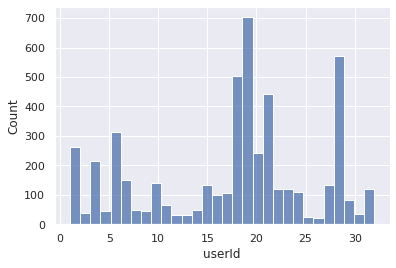

In [23]:
sns.histplot(x="userId", bins=30, data=rating)
plt.savefig("hist.jpg")
plt.show()

Dalam bentuk tabel

In [24]:
rating[(rating["userId"] == 19)]

,userId,movieId,rating
2274,19,1,4.0
2275,19,2,3.0
2276,19,3,3.0
2277,19,7,2.0
2278,19,10,2.0
...,...,...,...
2972,19,3825,3.0
2973,19,3826,1.0
2974,19,3835,2.0
2975,19,3837,1.0


Melihat rating terbanyak pada user

In [25]:
rating.groupby("userId").sum().idxmax()

movieId    21
rating     18
dtype: int64

Load dataset tag

In [26]:
tag = pd.read_csv("/content/drive/MyDrive/Machine Learning/tags.csv")
tag.info()
tag.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


Mengetahui jumlah jenis-jenis film

In [27]:
print(tag["tag"].unique())
print(garis())
print("Jumlah jenis film sebanyak {} film".format(len(tag["tag"].unique())))

['funny' 'Highly quotable' 'will ferrell' ... 'gun fu' 'heroic bloodshed'
 'Heroic Bloodshed']
--------------------------------------------------------------------------------
Jumlah jenis film sebanyak 1589 film


Load dataset link

In [28]:
link = pd.read_csv("/content/drive/MyDrive/Machine Learning/links.csv")
link.info()
link.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


### Data Preparation

Mengecek apakah ada nilai yang bernilai NaN

In [29]:
link.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

Menghapus fitur yang bernilai NaN

In [30]:
link.dropna(inplace=True)
link

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0
...,...,...,...
9737,193581,5476944,432131.0
9738,193583,5914996,445030.0
9739,193585,6397426,479308.0
9740,193587,8391976,483455.0


Menggabungkan data rating dengan movie

In [31]:
data = pd.merge(rating, movie, on="movieId", how="left")
data

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure
1,1,3,4.0,Grumpier Old Men (1995),Comedy
2,1,6,4.0,Heat (1995),Action
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery
4,1,50,5.0,"Usual Suspects, The (1995)",Crime
...,...,...,...,...,...
4995,32,780,3.0,Independence Day (a.k.a. ID4) (1996),Action
4996,32,784,3.0,"Cable Guy, The (1996)",Comedy
4997,32,786,3.0,Eraser (1996),Action
4998,32,788,1.0,"Nutty Professor, The (1996)",Comedy


###Data Preparation

Mengecek apakah ada yang bernilai NaN pada dataset

In [32]:
data.isnull().sum()

userId        0
movieId       0
rating        0
title      2054
genres     2054
dtype: int64

Menghapus fitur yang bernilai NaN

In [33]:
data.dropna(inplace=True)
data

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure
1,1,3,4.0,Grumpier Old Men (1995),Comedy
2,1,6,4.0,Heat (1995),Action
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery
4,1,50,5.0,"Usual Suspects, The (1995)",Crime
...,...,...,...,...,...
4995,32,780,3.0,Independence Day (a.k.a. ID4) (1996),Action
4996,32,784,3.0,"Cable Guy, The (1996)",Comedy
4997,32,786,3.0,Eraser (1996),Action
4998,32,788,1.0,"Nutty Professor, The (1996)",Comedy


Mengurutkan dataset berdasarkan kode film

In [34]:
data.sort_values(by="movieId", ascending=True)

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure
4879,31,1,5.0,Toy Story (1995),Adventure
4059,27,1,3.0,Toy Story (1995),Adventure
4929,32,1,3.0,Toy Story (1995),Adventure
3219,21,1,4.0,Toy Story (1995),Adventure
...,...,...,...,...,...
4407,28,3317,2.0,Wonder Boys (2000),Comedy
471,4,3317,4.0,Wonder Boys (2000),Comedy
2887,19,3324,2.0,Drowning Mona (2000),Comedy
4408,28,3328,4.0,Ghost Dog: The Way of the Samurai (1999),Crime


Mengetahui jumlah film segaligus jumlah genre film pada dataset

In [35]:
print(garis())
print("Jumlah film {} film".format(len(data["movieId"].unique())))
print("Jumlah genre tiap film {} film".format(len(data["genres"].unique())))
print(garis())

--------------------------------------------------------------------------------
Jumlah film 1226 film
Jumlah genre tiap film 17 film
--------------------------------------------------------------------------------


Mengetahui ada berapa banyak genre film

In [36]:
data["genres"].unique()

array(['Adventure', 'Comedy', 'Action', 'Mystery', 'Crime', 'Thriller',
       'Drama', 'Animation', 'Children', 'Horror', 'Documentary',
       'Film-Noir', 'Fantasy', 'Western', 'Sci-Fi', 'Musical', 'Romance'],
      dtype=object)

Mengecek apakah ada fitur yang bernilai NaN

In [37]:
data.isnull().sum()

userId     0
movieId    0
rating     0
title      0
genres     0
dtype: int64

Mengetahui jumlah genre film

In [38]:
print("Jumlah film yang bergenre sebanyak {} film".format(len(data["genres"].unique())))

Jumlah film yang bergenre sebanyak 17 film


Mengubah karakter uppercase to lowercase

In [39]:
data["genres"].replace(["Sci-Fi", "Film-Noir"], ["scifi","filmnoir"], inplace=True)
data["genres"].unique()

array(['Adventure', 'Comedy', 'Action', 'Mystery', 'Crime', 'Thriller',
       'Drama', 'Animation', 'Children', 'Horror', 'Documentary',
       'filmnoir', 'Fantasy', 'Western', 'scifi', 'Musical', 'Romance'],
      dtype=object)

Mengubah karakter uppercase to lowercase

In [40]:
data = data.assign(genres = lambda x:x["genres"].str.lower())
data

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),adventure
1,1,3,4.0,Grumpier Old Men (1995),comedy
2,1,6,4.0,Heat (1995),action
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),mystery
4,1,50,5.0,"Usual Suspects, The (1995)",crime
...,...,...,...,...,...
4995,32,780,3.0,Independence Day (a.k.a. ID4) (1996),action
4996,32,784,3.0,"Cable Guy, The (1996)",comedy
4997,32,786,3.0,Eraser (1996),action
4998,32,788,1.0,"Nutty Professor, The (1996)",comedy


Menghapus data yang bernilai sama pada kode film

In [41]:
data.drop_duplicates("movieId", inplace=True)
data

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),adventure
1,1,3,4.0,Grumpier Old Men (1995),comedy
2,1,6,4.0,Heat (1995),action
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),mystery
4,1,50,5.0,"Usual Suspects, The (1995)",crime
...,...,...,...,...,...
4951,32,194,5.0,Smoke (1995),comedy
4952,32,203,4.0,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
4955,32,246,4.0,Hoop Dreams (1994),documentary
4974,32,471,3.0,"Hudsucker Proxy, The (1994)",comedy


Mengetahui jumlah genre film

In [42]:
data["genres"].unique()

array(['adventure', 'comedy', 'action', 'mystery', 'crime', 'thriller',
       'drama', 'animation', 'children', 'horror', 'documentary',
       'filmnoir', 'fantasy', 'western', 'scifi', 'musical', 'romance'],
      dtype=object)

In [43]:
print("Jumlah kode film yang sama sebanyak {} film".format(data.duplicated("movieId").sum()))

Jumlah kode film yang sama sebanyak 0 film


Mengubah tipe data float menjadi integer

In [44]:
data.iloc[:, :3] = data.iloc[:, :3].astype("int")
data

,userId,movieId,rating,title,genres
0,1,1,4,Toy Story (1995),adventure
1,1,3,4,Grumpier Old Men (1995),comedy
2,1,6,4,Heat (1995),action
3,1,47,5,Seven (a.k.a. Se7en) (1995),mystery
4,1,50,5,"Usual Suspects, The (1995)",crime
...,...,...,...,...,...
4951,32,194,5,Smoke (1995),comedy
4952,32,203,4,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
4955,32,246,4,Hoop Dreams (1994),documentary
4974,32,471,3,"Hudsucker Proxy, The (1994)",comedy


Reset index

In [45]:
data = data.reset_index()
data

,index,userId,movieId,rating,title,genres
0,0,1,1,4,Toy Story (1995),adventure
1,1,1,3,4,Grumpier Old Men (1995),comedy
2,2,1,6,4,Heat (1995),action
3,3,1,47,5,Seven (a.k.a. Se7en) (1995),mystery
4,4,1,50,5,"Usual Suspects, The (1995)",crime
...,...,...,...,...,...,...
1221,4951,32,194,5,Smoke (1995),comedy
1222,4952,32,203,4,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
1223,4955,32,246,4,Hoop Dreams (1994),documentary
1224,4974,32,471,3,"Hudsucker Proxy, The (1994)",comedy


In [46]:
data.drop("index", axis=1, inplace=True)
data

,userId,movieId,rating,title,genres
0,1,1,4,Toy Story (1995),adventure
1,1,3,4,Grumpier Old Men (1995),comedy
2,1,6,4,Heat (1995),action
3,1,47,5,Seven (a.k.a. Se7en) (1995),mystery
4,1,50,5,"Usual Suspects, The (1995)",crime
...,...,...,...,...,...
1221,32,194,5,Smoke (1995),comedy
1222,32,203,4,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
1223,32,246,4,Hoop Dreams (1994),documentary
1224,32,471,3,"Hudsucker Proxy, The (1994)",comedy


Mengubah data dari dataframe menjadi list

In [47]:
id_film = data["movieId"].to_list()
judul_film = data["title"].to_list()
genre_film = data["genres"].to_list()

print(garis())
print(len(id_film))
print(len(judul_film))
print(len(genre_film))
print(garis())

--------------------------------------------------------------------------------
1226
1226
1226
--------------------------------------------------------------------------------


Menambahkan data list kedalam bentuk dataframe

In [48]:
data_baru = pd.DataFrame({
    "id_film":id_film,
    "judul_film":judul_film,
    "genre_film":genre_film,
})
data_baru

,id_film,judul_film,genre_film
0,1,Toy Story (1995),adventure
1,3,Grumpier Old Men (1995),comedy
2,6,Heat (1995),action
3,47,Seven (a.k.a. Se7en) (1995),mystery
4,50,"Usual Suspects, The (1995)",crime
...,...,...,...
1221,194,Smoke (1995),comedy
1222,203,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
1223,246,Hoop Dreams (1994),documentary
1224,471,"Hudsucker Proxy, The (1994)",comedy


### Modeling

#### Content Based Filtering

Mengacak data

In [49]:
data_baru.sample(5)

,id_film,judul_film,genre_film
650,1088,Dirty Dancing (1987),drama
372,474,In the Line of Fire (1993),action
267,892,Twelfth Night (1996),comedy
103,1617,L.A. Confidential (1997),crime
97,1500,Grosse Pointe Blank (1997),comedy


Menentukan fitur-fitur penting yang ada pada genre film

In [50]:
tf = TfidfVectorizer()
tf.fit(data_baru["genre_film"])

tf.get_feature_names() 

['action',
 'adventure',
 'animation',
 'children',
 'comedy',
 'crime',
 'documentary',
 'drama',
 'fantasy',
 'filmnoir',
 'horror',
 'musical',
 'mystery',
 'romance',
 'scifi',
 'thriller',
 'western']

Transformasi data dalam bentuk matrix

In [51]:
matrix = tf.fit_transform(data_baru["genre_film"])
matrix.shape

(1226, 17)

In [52]:
matrix.todense()

matrix([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]])

Memasukan data matrix kedalam dataframe dan untuk mengetahui korelasi antara judul film dan genre film

In [53]:
pd.DataFrame(
    matrix.todense(),
    columns=tf.get_feature_names(),
    index=data_baru["judul_film"]
)

,action,adventure,animation,children,comedy,crime,documentary,drama,fantasy,filmnoir,horror,musical,mystery,romance,scifi,thriller,western
judul_film,,,,,,,,,,,,,,,,,
Toy Story (1995),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Grumpier Old Men (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Heat (1995),1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Seven (a.k.a. Se7en) (1995),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"Usual Suspects, The (1995)",0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Smoke (1995),0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"To Wong Foo, Thanks for Everything! Julie Newmar (1995)",0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hoop Dreams (1994),0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Menentukan kemiripan judul film yang satu dengan yang lainnya untuk direkomendasikan

In [54]:
cos_kemiripan = cosine_similarity(matrix)
cos_kemiripan

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.]])

Memasukan nilai kemiripan pada dataframe agar lebih mudah dianalisa

In [55]:
cos_kemiripan_df = pd.DataFrame(
    cos_kemiripan,
    columns=data_baru["judul_film"],
    index=data_baru["judul_film"]
)

cos_kemiripan_df.sample(10, axis=0).sample(5, axis=1)

judul_film,Lethal Weapon 3 (1992),Fletch (1985),Dazed and Confused (1993),Shallow Grave (1994),I'll Do Anything (1994)
judul_film,,,,,
Sgt. Bilko (1996),0.0,1.0,1.0,1.0,1.0
"Thin Red Line, The (1998)",1.0,0.0,0.0,0.0,0.0
Fargo (1996),0.0,1.0,1.0,1.0,1.0
Before and After (1996),0.0,0.0,0.0,0.0,0.0
End of Days (1999),1.0,0.0,0.0,0.0,0.0
National Lampoon's Senior Trip (1995),0.0,1.0,1.0,1.0,1.0
Jeffrey (1995),0.0,1.0,1.0,1.0,1.0
U.S. Marshals (1998),1.0,0.0,0.0,0.0,0.0
I Like It Like That (1994),0.0,1.0,1.0,1.0,1.0


Dimensi ukuran dataframe (baris, kolom)

In [56]:
cos_kemiripan_df.shape

(1226, 1226)

Membuat sebuah fungsi kemiripan judul film dengan genre film

In [57]:
def film_rekomendasi(judul_film, similarity_data=cos_kemiripan_df, items=data_baru[['judul_film', 'genre_film']], k=5):
  """
  Rekomendasi Film berdasarkan kemiripan dataframe
  
  Parameter:
  ---
  judul_ilm : tipe data string (str)
              Nama Restoran (index kemiripan dataframe)
  similarity_data : tipe data pd.DataFrame (object)
                    Kesamaan dataframe, simetrik, dengan film sebagai 
                    indeks dan kolom
  items : tipe data pd.DataFrame (object)
          Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
  k : tipe data integer (int)
      Banyaknya jumlah rekomendasi yang diberikan
  ---


  Pada index ini, kita mengambil k dengan nilai similarity terbesar 
  pada index matrix yang diberikan (i).
  """


  # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
  # Dataframe diubah menjadi numpy
  # Range(start, stop, step)
  index = similarity_data.loc[:, judul_film].to_numpy().argpartition(
      range(-1, -k, -1))
  
  # Mengambil data dengan similarity terbesar dari index yang ada
  closest = similarity_data.columns[index[-1:-(k+2):-1]]
  
  # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
  closest = closest.drop(judul_film, errors='ignore')

  return pd.DataFrame(closest).merge(items).head(k)

Mengambil contoh judul film

In [58]:
data_baru[(data_baru["judul_film"].eq("Toy Story (1995)"))]

,id_film,judul_film,genre_film
0,1,Toy Story (1995),adventure


Panggil argumen fungsi

In [59]:
film_rekomendasi("Toy Story (1995)")

,judul_film,genre_film
0,"Grand Day Out with Wallace and Gromit, A (1989)",adventure
1,Howard the Duck (1986),adventure
2,Adventures of Buckaroo Banzai Across the 8th D...,adventure
3,Legend (1985),adventure
4,101 Dalmatians (One Hundred and One Dalmatians...,adventure


Evaluasi Precision Content Based Filtering

In [60]:
precision = film_rekomendasi("Toy Story (1995)")

def hitung(x):
  """
    Menghitung precision menggunakan perhitungan manual
  """

  daftar_genre = []
  x = x.to_list()
  
  for z in range(len(x)):
    if x[z] == "adventure":
      daftar_genre.append(x)
      daftar_genre = np.array(daftar_genre).flatten()
      break
    else:
      daftar_genre

  hasil = len(daftar_genre)/len(x)*100
  return "Genre adventure ditemukan sebanyak {} % dari 5 genre film".format(int(hasil))

print(hitung(precision["genre_film"]))

Genre adventure ditemukan sebanyak 100 % dari 5 genre film


### Colaborative Filtering

Load rating dataset yang sudah dibuat

In [61]:
rating

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
...,...,...,...
4995,32,780,3.0
4996,32,784,3.0
4997,32,786,3.0
4998,32,788,1.0


### Data Preparation

Mengubah jumlah user ke list

In [62]:
id_user = rating["userId"].unique().tolist()
print("daftar kode user : {}".format(id_user))
print(garis(), garis(), garis())
print("Jumlah user sebanyak {} user".format(len(rating["userId"].unique())))

daftar kode user : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]
-------------------------------------------------------------------------------- -------------------------------------------------------------------------------- --------------------------------------------------------------------------------
Jumlah user sebanyak 32 user


Mengubah kode user menjadi kode index dan begitupun sebaliknya

In [63]:
user_to_encode = {x:i for i,x in enumerate(id_user)}
print("User to Encode : ", user_to_encode)
print(garis(), garis(), garis())

encode_to_user = {i:x for i,x in enumerate(id_user)}
print("Encode to User : ", encode_to_user)

User to Encode :  {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31}
-------------------------------------------------------------------------------- -------------------------------------------------------------------------------- --------------------------------------------------------------------------------
Encode to User :  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32}


Mengubah jumlah film ke list

In [64]:
id_film = rating["movieId"].unique().tolist()
print("daftar kode film : {}".format(id_film))
print(garis(), garis(), garis())
print("Jumlah film sebanyak {} film".format(len(rating["movieId"].unique())))

daftar kode film : [1, 3, 6, 47, 50, 70, 101, 110, 151, 157, 163, 216, 223, 231, 235, 260, 296, 316, 333, 349, 356, 362, 367, 423, 441, 457, 480, 500, 527, 543, 552, 553, 590, 592, 593, 596, 608, 648, 661, 673, 733, 736, 780, 804, 919, 923, 940, 943, 954, 1009, 1023, 1024, 1025, 1029, 1030, 1031, 1032, 1042, 1049, 1060, 1073, 1080, 1089, 1090, 1092, 1097, 1127, 1136, 1196, 1197, 1198, 1206, 1208, 1210, 1213, 1214, 1219, 1220, 1222, 1224, 1226, 1240, 1256, 1258, 1265, 1270, 1275, 1278, 1282, 1291, 1298, 1348, 1377, 1396, 1408, 1445, 1473, 1500, 1517, 1552, 1573, 1580, 1587, 1617, 1620, 1625, 1644, 1676, 1732, 1777, 1793, 1804, 1805, 1920, 1927, 1954, 1967, 2000, 2005, 2012, 2018, 2028, 2033, 2046, 2048, 2054, 2058, 2078, 2090, 2093, 2094, 2096, 2099, 2105, 2115, 2116, 2137, 2139, 2141, 2143, 2161, 2174, 2193, 2253, 2268, 2273, 2291, 2329, 2338, 2353, 2366, 2387, 2389, 2395, 2406, 2414, 2427, 2450, 2459, 2470, 2478, 2492, 2502, 2528, 2529, 2542, 2571, 2580, 2596, 2616, 2617, 2628, 2640, 

Mengubah kode film menjadi kode index dan begitupun sebaliknya

In [65]:
film_to_encode = {x:i for i,x in enumerate(id_film)}
print("Film to Encode : ", film_to_encode)
print(garis(), garis(), garis())

encode_to_film = {i:x for i,x in enumerate(id_film)}
print("Encode to User : ", encode_to_film)

Film to Encode :  {1: 0, 3: 1, 6: 2, 47: 3, 50: 4, 70: 5, 101: 6, 110: 7, 151: 8, 157: 9, 163: 10, 216: 11, 223: 12, 231: 13, 235: 14, 260: 15, 296: 16, 316: 17, 333: 18, 349: 19, 356: 20, 362: 21, 367: 22, 423: 23, 441: 24, 457: 25, 480: 26, 500: 27, 527: 28, 543: 29, 552: 30, 553: 31, 590: 32, 592: 33, 593: 34, 596: 35, 608: 36, 648: 37, 661: 38, 673: 39, 733: 40, 736: 41, 780: 42, 804: 43, 919: 44, 923: 45, 940: 46, 943: 47, 954: 48, 1009: 49, 1023: 50, 1024: 51, 1025: 52, 1029: 53, 1030: 54, 1031: 55, 1032: 56, 1042: 57, 1049: 58, 1060: 59, 1073: 60, 1080: 61, 1089: 62, 1090: 63, 1092: 64, 1097: 65, 1127: 66, 1136: 67, 1196: 68, 1197: 69, 1198: 70, 1206: 71, 1208: 72, 1210: 73, 1213: 74, 1214: 75, 1219: 76, 1220: 77, 1222: 78, 1224: 79, 1226: 80, 1240: 81, 1256: 82, 1258: 83, 1265: 84, 1270: 85, 1275: 86, 1278: 87, 1282: 88, 1291: 89, 1298: 90, 1348: 91, 1377: 92, 1396: 93, 1408: 94, 1445: 95, 1473: 96, 1500: 97, 1517: 98, 1552: 99, 1573: 100, 1580: 101, 1587: 102, 1617: 103, 1620:

Memetakan kode index yang sudah dibuat kedalam dataframe

In [66]:
rating["user"] = rating["userId"].map(user_to_encode)
rating['film'] = rating['movieId'].map(film_to_encode)
rating

,userId,movieId,rating,user,film
0,1,1,4.0,0,0
1,1,3,4.0,0,1
2,1,6,4.0,0,2
3,1,47,5.0,0,3
4,1,50,5.0,0,4
...,...,...,...,...,...
4995,32,780,3.0,31,42
4996,32,784,3.0,31,1025
4997,32,786,3.0,31,2426
4998,32,788,1.0,31,1430


Jumlah yang sudah dipetakan jumlah user dan film

In [67]:
jum_user = len(user_to_encode)
jum_film = len(encode_to_film
               )
print(garis())
print(jum_user)
print(jum_film)
print(garis())

--------------------------------------------------------------------------------
32
2427
--------------------------------------------------------------------------------


Mengetahui nilai maximum dan minimum fitur rating

In [68]:
min_rating = min(rating["rating"])
max_rating = max(rating["rating"])

print(garis())
print("Rating terkecil ", min_rating)
print("Rating terbesar ", max_rating)
print(garis())

--------------------------------------------------------------------------------
Rating terkecil  0.0
Rating terbesar  5.0
--------------------------------------------------------------------------------


Mengacak data rating

In [69]:
rating.sample(5)

,userId,movieId,rating,user,film
64,1,1092,5.0,0,64
1000,7,31878,4.0,6,802
4311,28,1580,3.0,27,101
2274,19,1,4.0,18,0
1221,10,82167,4.0,9,936


Normalisasi fitur rating 

In [70]:
a = rating["rating"].values.reshape(-1,1)

scaler = MinMaxScaler()
scaler.fit(a)
rating["rating"] = scaler.transform(a)

Ambil nilai masing-masing fitur dalam bentuk numpy

In [71]:
X = rating.iloc[:, 3:].values
y = rating["rating"].values

Ubah kedalam porsi training dan vaidationset dalam porsi 80:20

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(garis())
print("Jumlah training {} baris {} kolom".format(X_train.shape[0], X_train.shape[1]))
print("Jumlah validasi {} baris {} kolom".format(X_test.shape[0], X_test.shape[1]))
print(garis())

--------------------------------------------------------------------------------
Jumlah training 4000 baris 2 kolom
Jumlah validasi 1000 baris 2 kolom
--------------------------------------------------------------------------------


Membuat arsitektur fungsi neural network

In [73]:
class RecommenderNet(tfw.keras.Model):

  def __init__(self, jum_user, jum_film, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.jum_user = jum_user
    self.jum_film = jum_film
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        jum_user,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(jum_user, 1)
    self.film_embedding = layers.Embedding(
        jum_film,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.film_bias = layers.Embedding(jum_film, 1) 
  
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0])
    user_bias = self.user_bias(inputs[:, 0])
    film_vector = self.film_embedding(inputs[:, 1])
    film_bias = self.film_bias(inputs[:, 1])
  
    dot_user_film = tfw.tensordot(user_vector, film_vector, 2) 
  
    x = dot_user_film + user_bias + film_bias
    
    return tfw.nn.sigmoid(x)
  
model = RecommenderNet(jum_user, jum_film, 50)

Panggil kompiler model

In [74]:
model.compile(
    loss = tfw.keras.losses.BinaryCrossentropy(),
    optimizer = tfw.keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tfw.keras.metrics.RootMeanSquaredError()]
)

Training model

In [75]:
history = model.fit(
    x = X_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (X_test, y_test)
)

Epoch 1/100
500/500 [==============================] - 5s 4ms/step - loss: 0.6802 - root_mean_squared_error: 0.2738 - val_loss: 0.6604 - val_root_mean_squared_error: 0.2547
Epoch 2/100
500/500 [==============================] - 2s 3ms/step - loss: 0.6206 - root_mean_squared_error: 0.2151 - val_loss: 0.6630 - val_root_mean_squared_error: 0.2573
Epoch 3/100
500/500 [==============================] - 2s 3ms/step - loss: 0.6111 - root_mean_squared_error: 0.2050 - val_loss: 0.6519 - val_root_mean_squared_error: 0.2467
Epoch 4/100
500/500 [==============================] - 2s 4ms/step - loss: 0.6024 - root_mean_squared_error: 0.1959 - val_loss: 0.6527 - val_root_mean_squared_error: 0.2475
Epoch 5/100
500/500 [==============================] - 2s 4ms/step - loss: 0.5995 - root_mean_squared_error: 0.1928 - val_loss: 0.6450 - val_root_mean_squared_error: 0.2401
Epoch 6/100
500/500 [==============================] - 2s 3ms/step - loss: 0.5945 - root_mean_squared_error: 0.1871 - val_loss: 0.6443 

Visualisasikan model yang sudah ditraining

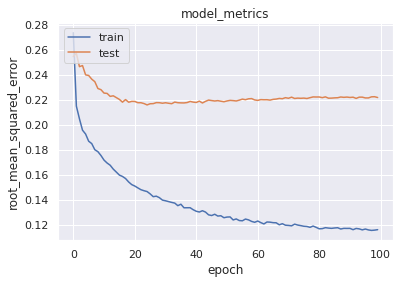

In [76]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig("rmse.jpg")
plt.show()

Data Uji

In [77]:
data_baru

,id_film,judul_film,genre_film
0,1,Toy Story (1995),adventure
1,3,Grumpier Old Men (1995),comedy
2,6,Heat (1995),action
3,47,Seven (a.k.a. Se7en) (1995),mystery
4,50,"Usual Suspects, The (1995)",crime
...,...,...,...
1221,194,Smoke (1995),comedy
1222,203,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
1223,246,Hoop Dreams (1994),documentary
1224,471,"Hudsucker Proxy, The (1994)",comedy


Load dataset rating

In [78]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/ratings.csv", nrows=5000)
df.head(5)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Fungsi untuk merekomendasikan film

In [79]:
id_user = df["userId"].sample(1).iloc[0]
film_visited_by_user = df[(df["userId"] == id_user)]
 
film_not_visited = data_baru[~data_baru['id_film'].isin(film_visited_by_user["movieId"].values)]['id_film'] 
film_not_visited = list(
    set(film_not_visited)
    .intersection(set(film_to_encode.keys()))
)
 
film_not_visited = [[film_to_encode.get(x)] for x in film_not_visited]
user_encoder = user_to_encode.get(id_user)
user_resto_array = np.hstack(
    ([[user_encoder]] * len(film_not_visited), film_not_visited)
)

In [80]:
data_baru

,id_film,judul_film,genre_film
0,1,Toy Story (1995),adventure
1,3,Grumpier Old Men (1995),comedy
2,6,Heat (1995),action
3,47,Seven (a.k.a. Se7en) (1995),mystery
4,50,"Usual Suspects, The (1995)",crime
...,...,...,...
1221,194,Smoke (1995),comedy
1222,203,"To Wong Foo, Thanks for Everything! Julie Newm...",comedy
1223,246,Hoop Dreams (1994),documentary
1224,471,"Hudsucker Proxy, The (1994)",comedy


Buat sebuah prediksi 

In [81]:
y_pred = model.predict(user_resto_array).flatten()
 
top_ratings_indices = y_pred.argsort()[-10:][::-1]
recommended_film_ids = [
    encode_to_film.get(film_not_visited[x][0]) for x in top_ratings_indices
]
  
print('Showing recommendations for users: {}'.format(id_user))
print('===' * 9)
print('Film with high ratings from user')
print('----' * 8)
  
top_film_user = (
  film_visited_by_user.sort_values(
    by = 'rating',
    ascending=False
  )
  .head(5)
  .movieId.values
)
  
film_df_rows = data_baru[data_baru['id_film'].isin(top_film_user)]
for row in film_df_rows.itertuples():
    print(row.judul_film, ':', row.genre_film)
  
print('----' * 8)
print("\n")
print('Top 10 film recommendation')
print('----' * 8)
  
recommended_film = data_baru[data_baru['id_film'].isin(recommended_film_ids)]
for row in recommended_film.itertuples():
    print(row.judul_film, ':', row.genre_film)

20/20 [==============================] - 0s 2ms/step
Showing recommendations for users: 19
Film with high ratings from user
--------------------------------
Princess Bride, The (1987) : action
Rear Window (1954) : mystery
Maltese Falcon, The (1941) : filmnoir
Ferris Bueller's Day Off (1986) : comedy
Nightmare Before Christmas, The (1993) : animation
--------------------------------


Top 10 film recommendation
--------------------------------
Wizard of Oz, The (1939) : adventure
West Side Story (1961) : drama
Cookie's Fortune (1999) : comedy
First Knight (1995) : action
Houseguest (1994) : comedy
Just Cause (1995) : mystery
Miracle on 34th Street (1994) : drama
Aristocats, The (1970) : animation
Producers, The (1968) : comedy
Madness of King George, The (1994) : comedy
